# Full Model Training

Welcome to the notebook that will guide you in using MLflow to register and track the training of a logistic regression model with the Titanic dataset. In this tutorial, we will explore how MLflow, an open-source platform for the machine learning lifecycle, can facilitate experiment tracking, metric monitoring, and model management in a reproducible environment.

The Titanic dataset is a classic in the data science community, containing detailed information about passengers, such as their age, gender, ticket class, and whether they survived the disaster. We will use this information to build a logistic regression model capable of predicting the survival probability of a passenger based on their features.

Throughout this notebook, we will not only focus on training the logistic regression model but also learn how to leverage the capabilities of MLflow. We will start by exploring the Titanic dataset, performing analysis and visualizations to better understand the distribution of variables and patterns present.

Next, we will move on to the data preprocessing stage, where we will clean and transform the data to make it suitable for modeling. During this process, we will use MLflow to log the preprocessing steps, allowing us to have a complete and organized record of the transformations applied to the data.

Then, we will dive into training the logistic regression using the training dataset. Here, MLflow will play a crucial role in logging training details, including the hyperparameters used, performance metrics, and other relevant aspects of the model. This will enable us to have a comprehensive overview of the process and facilitate comparison between different experiments and configurations.

Once we have trained our model, we will use MLflow to register the model on the platform. This will allow us to have a complete record of the trained models, including the details of each model, such as the hyperparameters used, performance metrics, and associated source code. Additionally, MLflow will enable us to export the model in a standard format, making it easier to deploy in different environments.

In summary, this notebook will provide you with the opportunity to work with MLflow and discover how this powerful tool can simplify and enhance the training process of a logistic regression model. Throughout the tutorial, you will learn to log experiments, metrics, and model details, allowing you to have a comprehensive and reproducible tracking of the entire process. So get ready to delve into Titanic data analysis while exploring the capabilities of MLflow in logistic regression training!

In [1]:
from datetime import datetime

from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import mlflow

from mlops_course.settings import config

## Get the Data

We will load the dataset from a CSV file and display the first few rows to get an understanding of the data.

### Read the data

In [2]:
DATASET_URL = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"


# Load dataset
dataframe = pd.read_csv(DATASET_URL)
dataframe.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Clean the Data

In [3]:
dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see that there are missing values in the 'Age', 'Cabin', and 'Embarked' columns. We'll fill the missing values in the 'Age' column with the median age.


In [4]:
# Fill age missing values
median_age = dataframe['Age'].median()
dataframe['Age'].fillna(median_age, inplace=True)

Sex is a categorical variable composed by "male" and "female" string values. In order to train our model we need to convert them to numerical values: male=1, female=0

In [5]:
# convert string labels to numbers: male=1, female=0
le = LabelEncoder()
dataframe["Sex"] = le.fit_transform(dataframe["Sex"])

### Visualize the data

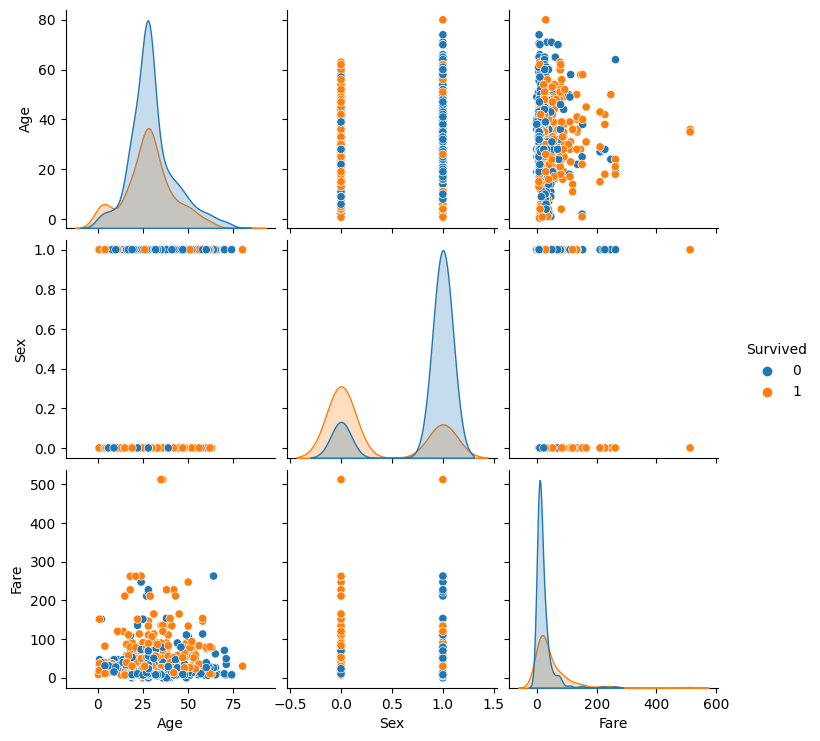

In [6]:
sns.pairplot(dataframe[["Age", "Sex", "Fare", "Survived"]], hue="Survived")

### Split the data

In [7]:
RANDOM_SEED = 42  # Set a random seed for reproducibility
TEST_SIZE = 0.2  # Use 20% of the data for testing

# Prepare the dataset for training
features = ['Sex', 'Age', 'Fare']
X = dataframe[features]
Y = dataframe['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

## Train the Model

We'll train the model and we will use MLflow to log that model: logging a model means saving the model to a file or a database so that it can be used later for inference.

### Connect to the MLflow server

In [8]:
# Set the URI where the MLflow server is running
mlflow.set_tracking_uri(uri=config.MLFLOW_TRACKING_URI)
print("✅ Successfully connected to the MLflow server")

✅ Successfully connected to the MLflow server


### Create the experiment

In [9]:
EXPERIMENT_NAME = "Titanic Linear Regression"  # change this to your experiment name


# Create an experiment if it doesn't exist
try:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
    print(f"✅ Created '{EXPERIMENT_NAME}'!")
except mlflow.exceptions.RestException:
    experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
    print(f"✅ Experiment '{EXPERIMENT_NAME}' already exists!")

experiment = mlflow.get_experiment(experiment_id)

✅ Experiment 'Titanic Linear Regression' already exists!


### Train the model and log it to MLflow

In [10]:
run_name = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

with mlflow.start_run(
    experiment_id=experiment_id,
    run_name=run_name,
) as run:
    
    # Train the logistic regression model
    model = LogisticRegression(random_state=RANDOM_SEED)
    model.fit(X_train.values, y_train)

    # Log the model itself to MLflow
    mlflow.sklearn.log_model(model, "model")

    # Print the run ID
    print(f"Run ID: {run.info.run_id}")

Run ID: f14b6da63a47497eb837518537dfcdb2


/usr/local/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
